# ENEM 2016

### Desafio da semana: prever o valor da nota de matemática para os inscritos no ENEM 2016.

## Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

plt.style.use('grayscale')

## Correlações

In [2]:
df_train = pd.read_csv('train.csv', sep="," , encoding="UTF8" )
df_test = pd.read_csv('test.csv', sep="," , encoding="UTF8" )
df_resposta = pd.DataFrame()
print(set(df_test.columns).issubset(set(df_train.columns)))

True


In [3]:
df_train.corr()

,Unnamed: 0,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,...,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041
Unnamed: 0,1.000000,NaN,-0.007258,-0.007250,-0.007201,0.003678,0.005707,-0.006217,-0.004527,-0.004615,...,0.001520,0.018074,0.001693,-0.008141,0.002724,-0.004914,0.003906,0.001002,-0.010967,-0.029937
NU_ANO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CO_MUNICIPIO_RESIDENCIA,-0.007258,NaN,1.000000,0.999865,-0.002296,0.020813,-0.236178,0.009710,0.865294,0.865216,...,0.004115,-0.030114,-0.050304,-0.050138,-0.040668,-0.013479,-0.032710,-0.094862,-0.077456,-0.033205
CO_UF_RESIDENCIA,-0.007250,NaN,0.999865,1.000000,-0.002017,0.020947,-0.234786,0.009433,0.864791,0.864919,...,0.003968,-0.030345,-0.050096,-0.049292,-0.040688,-0.013647,-0.032467,-0.094113,-0.076838,-0.033149
NU_IDADE,-0.007201,NaN,-0.002296,-0.002017,1.000000,0.533462,0.009675,-0.017713,-0.030711,-0.030259,...,-0.044791,0.025077,-0.030681,0.012739,0.021949,-0.003569,-0.035306,-0.069973,-0.010988,0.160526
TP_ESTADO_CIVIL,0.003678,NaN,0.020813,0.020947,0.533462,1.000000,0.004950,-0.012160,-0.000046,0.000243,...,-0.017455,-0.009670,-0.016354,-0.002580,0.025840,0.002294,-0.014725,-0.066346,-0.022736,0.108771
TP_COR_RACA,0.005707,NaN,-0.236178,-0.234786,0.009675,0.004950,1.000000,0.015761,-0.253524,-0.252162,...,-0.010398,0.004446,0.031514,0.026052,0.055185,0.086642,0.069298,0.046830,0.053556,0.020966
TP_NACIONALIDADE,-0.006217,NaN,0.009710,0.009433,-0.017713,-0.012160,0.015761,1.000000,NaN,NaN,...,0.013515,0.001575,-0.003419,-0.018290,-0.005285,0.032588,0.024112,0.011327,0.014847,0.008132
CO_MUNICIPIO_NASCIMENTO,-0.004527,NaN,0.865294,0.864791,-0.030711,-0.000046,-0.253524,NaN,1.000000,0.999860,...,-0.001793,-0.043358,-0.051102,-0.057239,-0.046998,-0.024174,-0.038666,-0.097273,-0.081490,-0.042237
CO_UF_NASCIMENTO,-0.004615,NaN,0.865216,0.864919,-0.030259,0.000243,-0.252162,NaN,0.999860,1.000000,...,-0.002089,-0.043492,-0.051094,-0.056401,-0.047069,-0.024201,-0.038305,-0.096666,-0.080963,-0.042134


In [4]:
df_train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [5]:
df_test.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,...,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,...,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,...,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,...,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,...,0.0,320.0,D,H,H,C,B,A,NaN,A


## Dados

In [6]:
features_train = [
    'NU_NOTA_MT',
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_REDACAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5']

features_test = [
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_REDACAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5']

## Graficos

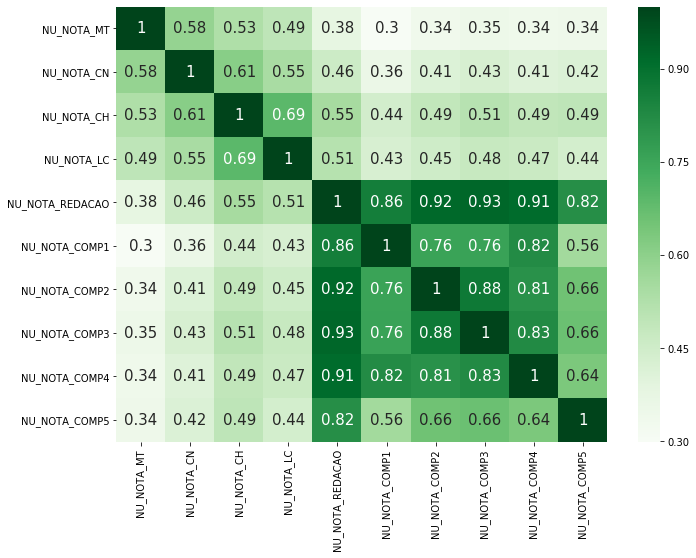

In [7]:
%matplotlib inline

corr = df_train[features_train].corr()
plt.subplots(figsize=(11, 8))
sns.heatmap(corr, annot=True, annot_kws={"size": 15}, linecolor='black', cmap='Greens')

In [8]:
df_test[features_test].isnull().sum()

NU_NOTA_CN         1134
NU_NOTA_CH         1134
NU_NOTA_LC         1199
NU_NOTA_REDACAO    1199
NU_NOTA_COMP1      1199
NU_NOTA_COMP2      1199
NU_NOTA_COMP3      1199
NU_NOTA_COMP4      1199
NU_NOTA_COMP5      1199
dtype: int64

In [9]:
df_test = df_test.loc[
      (df_test['NU_NOTA_CN'].notnull()) & 
      (df_test['NU_NOTA_CH'].notnull()) & 
      (df_test['NU_NOTA_LC'].notnull()) & 
      (df_test['NU_NOTA_REDACAO'].notnull())    
]

df_train = df_train.loc[
      (df_train['NU_NOTA_CN'].notnull()) & 
      (df_train['NU_NOTA_CH'].notnull()) & 
      (df_train['NU_NOTA_LC'].notnull()) & 
      (df_train['NU_NOTA_MT'].notnull()) &
      (df_train['NU_NOTA_REDACAO'].notnull())
]

df_test[features_test].isnull().sum()

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
NU_NOTA_COMP1      0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
dtype: int64

## Usando sklearn

In [10]:
y_train = df_train['NU_NOTA_MT']
x_train = df_train[features_test]
x_test = df_test[features_test]

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Usando o RandomForestRegressor

In [11]:
regressor = RandomForestRegressor( 
           criterion='mae', 
           max_depth=8,
           max_leaf_nodes=None,
           min_impurity_split=None,
           min_samples_leaf=1,
           min_samples_split=2,
           min_weight_fraction_leaf=0.0,
           n_estimators= 500,
           n_jobs=-1,
           random_state=0,
           verbose=0,
           warm_start=False
)

## realizando treino através do fit

In [14]:
regressor.fit(x_train, y_train)

RandomForestRegressor(criterion='mae', max_depth=8, n_estimators=500, n_jobs=-1,
                      random_state=0)

## Resultados

In [15]:
y_pred_test = regressor.predict(x_test)

df_resposta['NU_INSCRICAO'] = df_test['NU_INSCRICAO']
df_resposta['NU_NOTA_MT'] = np.around(y_pred_test,2)

df_resposta.to_csv('answer.csv', index=False, header=True)
print('Finalizado')

Finalizado


In [16]:
df_resposta.head()

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,418.93
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,442.20
2,b38a03232f43b11c9d0788abaf060f7366053b6d,592.65
4,715494628a50142ce8cb17191cfe6d0f3cae0934,498.43
5,e656d6bad65c93fb2880f1eba5037008c8e75774,466.73
